In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset is of 1470 entries and 35 Columns which has Object and Int type data 
#There are no null Values

In [4]:
#Total Number and list of the catagories present 
print('\n'"Total No of Departments :",len(df['Department'].unique()),end='\n\n')
print("List of Departments", df['Department'].unique(),end='\n\n')


print('\n'"Total No of EducationField :",len(df['EducationField'].unique()),end='\n\n')
print("List of EducationField", df['EducationField'].unique(),end='\n\n')


print('\n'"Total No of JobRole :",len(df['JobRole'].unique()),end='\n\n')
print("List of JobRole", df['JobRole'].unique(),end='\n\n')

print('\n'"Total No of Over18 :",len(df['Over18'].unique()),end='\n\n')
print("List of Over18", df['Over18'].unique(),end='\n\n')

print('\n'"Total No of BusinessTravel :",len(df['BusinessTravel'].unique()),end='\n\n')
print("List of BusinessTravel", df['BusinessTravel'].unique(),end='\n\n')

print('\n'"Total No of OverTime :",len(df['OverTime'].unique()),end='\n\n')
print("List of OverTime", df['OverTime'].unique(),end='\n\n')

print('\n'"Total No of EmployeeNumber  :",len(df['EmployeeNumber'].unique()),end='\n\n')
print("List of EmployeeNumber ", df['EmployeeNumber'].unique(),end='\n\n')

print('\n'"Total No of EmployeeCount  :",len(df['EmployeeCount'].unique()),end='\n\n')
print("List of EmployeeCount ", df['EmployeeCount'].unique(),end='\n\n')

print('\n'"Total No of MaritalStatus  :",len(df['MaritalStatus'].unique()),end='\n\n')
print("List of MaritalStatus ", df['MaritalStatus'].unique(),end='\n\n')




Total No of Departments : 3

List of Departments ['Sales' 'Research & Development' 'Human Resources']


Total No of EducationField : 6

List of EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


Total No of JobRole : 9

List of JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


Total No of Over18 : 1

List of Over18 ['Y']


Total No of BusinessTravel : 3

List of BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


Total No of OverTime : 2

List of OverTime ['Yes' 'No']


Total No of EmployeeNumber  : 1470

List of EmployeeNumber  [   1    2    4 ... 2064 2065 2068]


Total No of EmployeeCount  : 1

List of EmployeeCount  [1]


Total No of MaritalStatus  : 3

List of MaritalStatus  ['Single' 'Married' 'Divorced']



As the number of catagories in Over18 are 1 it can be dropped followed with EmployeeCount,EmployeeNumber- countinouse Variable

#Rest of the Coulmns OverTime,BusinessTravel,JobRole,EducationField,Departments,Gender,MaritalStatus and Attributes need to be Encoded 

In [5]:
df.Attrition.replace({'Yes': 1, 'No': 0}, inplace=True)
df.BusinessTravel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace=True)
df.Department.replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}, inplace=True)
df.Gender.replace({'Female': 0, 'Male': 1}, inplace=True)
df.MaritalStatus.replace({'Single': 0,'Married': 1, 'Divorced': 2}, inplace=True)
df.OverTime.replace({'No': 0, 'Yes': 1}, inplace=True)
df.EducationField.replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5}, inplace=True)
df.JobRole.replace({
    'Sales Executive': 0, 
    'Research Scientist': 1, 
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
    'Human Resources': 8
}, inplace=True)

In [6]:
df.drop(columns=["EmployeeCount","EmployeeNumber","Over18",],inplace=True)

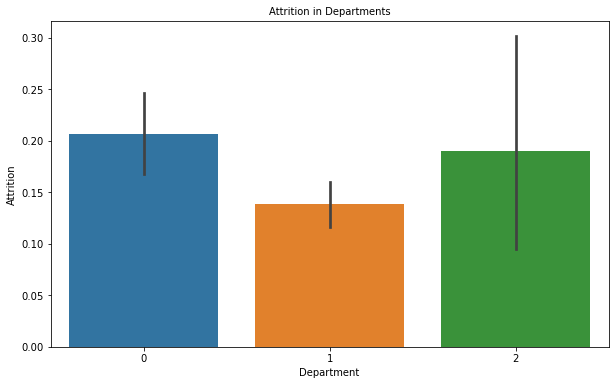

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Department', y = 'Attrition', data = df )
plt.xticks(rotation = 0)
plt.title('Attrition in Departments', fontsize = 10)
plt.show()

We can observe lesser Attrition in R&D Departmant and Sales has the highest 

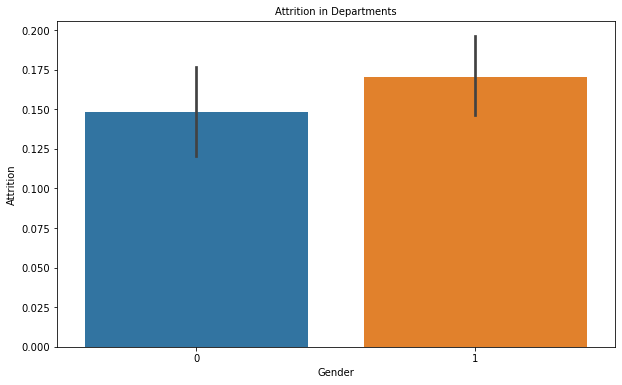

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Gender', y = 'Attrition', data = df )
plt.xticks(rotation = 0)
plt.title('Attrition in Departments', fontsize = 10)
plt.show()


In [9]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,0.739456,9.192517,2.912925,1.153741,2.721769,0.600000,65.891156,2.729932,2.063946,2.553061,2.728571,0.902721,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.383865,1.093082,0.490065,20.329428,0.711561,1.106940,2.323902,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,48.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,1.000000,7.000000,3.000000,1.000000,3.000000,1.000000,66.000000,3.000000,2.000000,2.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,4.000000,1.000000,83.750000,3.000000,3.000000,4.000000,4.000000,1.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel              0.082428
DailyRate                  -0.003519
Department                 -0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              1.358873
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                     0.770149
JobSatisfaction            -0.329672
MaritalStatus               0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [11]:
#AS we Can see that "StandardHours" has the same value across the dataset so it can also be dropped 
df.drop("StandardHours",axis=1,inplace=True)

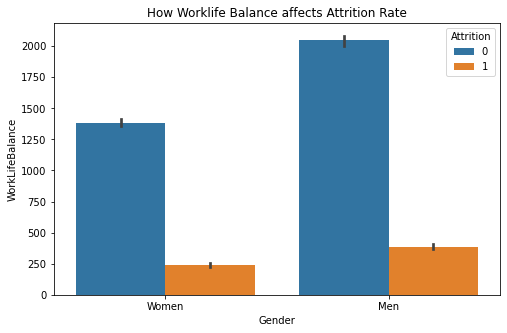

In [12]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x = df.Gender , y = df.WorkLifeBalance, estimator = np.sum, hue = df.Attrition)
ax.set_xticklabels(('Women', 'Men'))
plt.title('How Worklife Balance affects Attrition Rate')
plt.show()

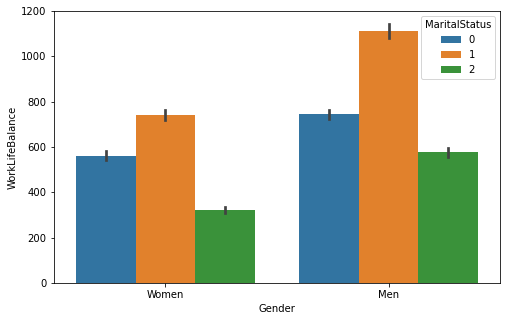

In [13]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x = df.Gender , y = df.WorkLifeBalance, estimator = np.sum, hue = df.MaritalStatus)
ax.set_xticklabels(('Women', 'Men'))
plt.show()

In [14]:
#Married Men We can observe higher Worklife Balance 

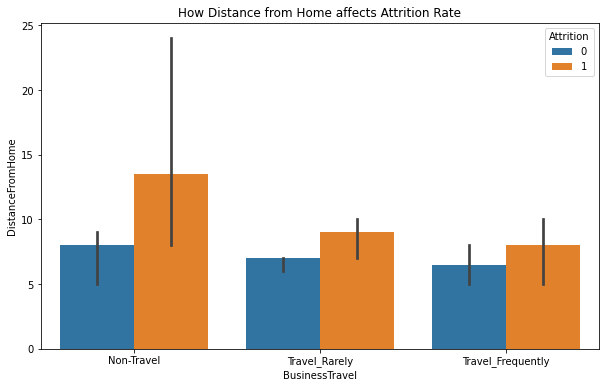

In [15]:
plt.figure(figsize=(10, 6))
plt.title('How Distance from Home affects Attrition Rate')
ax = sns.barplot(x = df.BusinessTravel , y = df.DistanceFromHome, estimator = np.median, hue = df.Attrition)
ax.set_xticklabels(('Non-Travel', 'Travel_Rarely', 'Travel_Frequently'))
plt.show()

In [16]:
#Distance Does Effect the nontravel Employees who travel longe in  higher Attrition rate 

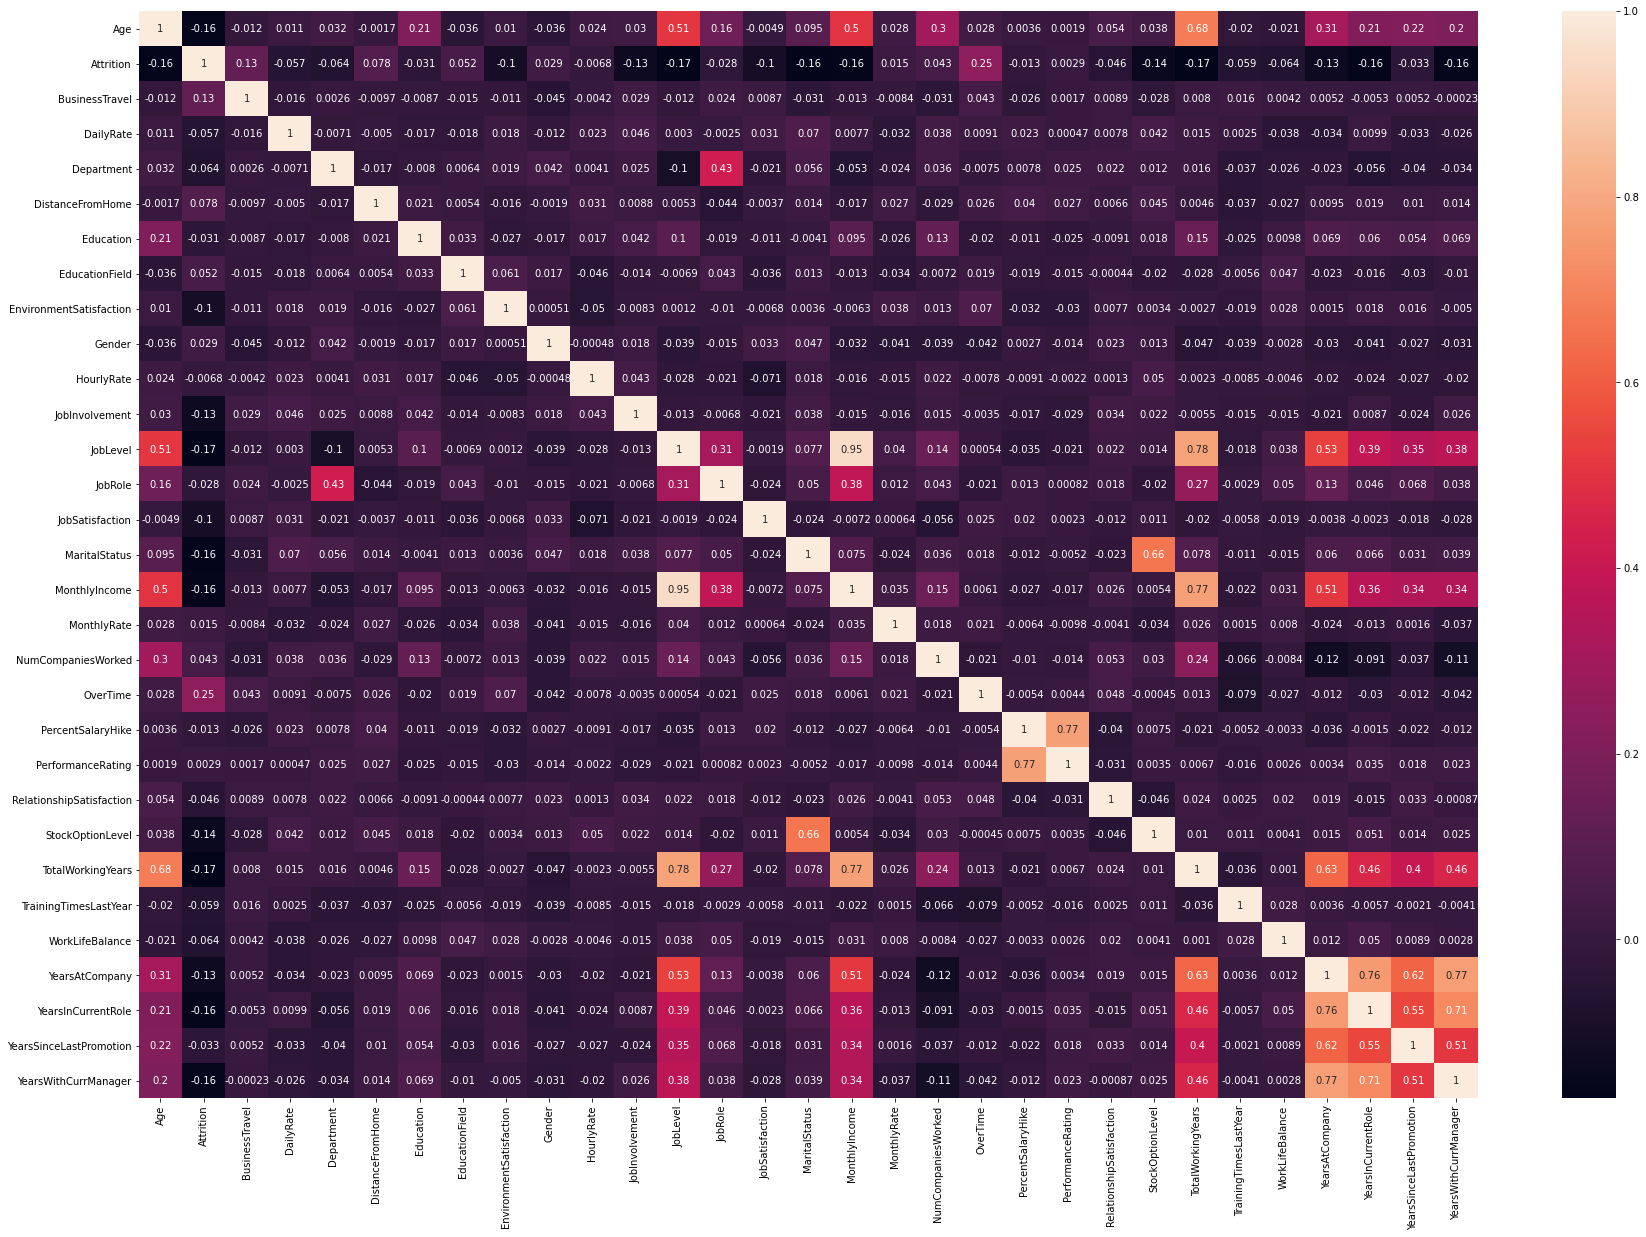

In [17]:
corr_hmap= df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [18]:
#We will now go ahead and Build the model 

In [19]:
y=df["Attrition"]
x=df.drop("Attrition", axis=1)


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [21]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
   # if round(accuracy_score(y_train,pred_train)*100,2)>round(accuracy_score(y_test,pred_test)*100,2):
    if accuracy_score(y_train,pred_train)*100>max_scr:  
        max_scr=accuracy_score(y_train,pred_train)*100
        print("At random state",i,"The model Perfomes very well")
        print("Training accuracy_score is:",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:",accuracy_score(y_test,pred_test), end = "\n\n\n")

At random state 30 The model Perfomes very well
Training accuracy_score is: 89.03061224489795
Testing accuracy_score is: 0.8571428571428571


At random state 32 The model Perfomes very well
Training accuracy_score is: 89.28571428571429
Testing accuracy_score is: 0.8537414965986394


At random state 43 The model Perfomes very well
Training accuracy_score is: 89.45578231292517
Testing accuracy_score is: 0.8537414965986394


At random state 50 The model Perfomes very well
Training accuracy_score is: 89.79591836734694
Testing accuracy_score is: 0.8673469387755102


At random state 69 The model Perfomes very well
Training accuracy_score is: 89.88095238095238
Testing accuracy_score is: 0.8469387755102041




In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=50)
num_folds = 10
seed = 50
scoring = 'accuracy'

In [38]:
models= [
    ("SVC",SVC()),
    ("Logistic Regression",LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes",GaussianNB()),
    ("KNearest Neighbors",KNeighborsClassifier(3)),
    ("RandomForestClassifier",RandomForestClassifier())
    ]

In [39]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


SVC: 0.867333 (0.028801)
Logistic Regression: 0.876655 (0.035972)
Decision Tree: 0.768630 (0.044779)
Naive Bayes: 0.778821 (0.041102)
KNearest Neighbors: 0.838433 (0.031657)
RandomForestClassifier: 0.864798 (0.028773)


we have achived best scores with Logistic Regression: 0.876655 (0.035972) and RandomForestClassifier: 0.861386 (0.030883)

# HyperParameter Tyning 

In [40]:
#Parameter of Scaling Logistic Regression

c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(C=c_values, solver=['newton-cg', 'lbfgs', 'liblinear'],penalty=['l2'])
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.880950 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
#11 0.874946 (0.038699) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
#11 0.874946 (0.038699) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
#11 0.874946 (0.038699) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
#7 0.876648 (0.037384) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
#7 0.876648 (0.037384) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
#7 0.876648 (0.037384) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
#5 0.876655 (0.035972) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
#5 0.876655 (0.035972) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
#10 0.875800 (0.036977) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
#1 0.880950 (0.031181) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
#1 0.880950 (0.031181) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
#3 0.878386 (0.032164) with: {'C': 0.1, 'penalty': 'l2', 'solve

In [41]:
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.862248 using {'max_features': 'sqrt', 'n_estimators': 100}
#3 0.861386 (0.026103) with: {'max_features': 'sqrt', 'n_estimators': 10}
#1 0.862248 (0.027035) with: {'max_features': 'sqrt', 'n_estimators': 100}
#4 0.857120 (0.029973) with: {'max_features': 'log2', 'n_estimators': 10}
#2 0.861394 (0.029441) with: {'max_features': 'log2', 'n_estimators': 100}


We have achived a accuracy of Best: 88.0950 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'} now we can go ahead with boosting techniques

In [42]:
LR= LogisticRegression(C= 0.1, penalty= 'l2', solver= 'newton-cg')
model= AdaBoostClassifier(n_estimators=50,base_estimator=LR)
model.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(C=0.1, solver='newton-cg'))

In [43]:
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8197278911564626
[[240   1]
 [ 52   1]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       241
           1       0.50      0.02      0.04        53

    accuracy                           0.82       294
   macro avg       0.66      0.51      0.47       294
weighted avg       0.76      0.82      0.74       294



In [44]:
LR= LogisticRegression(C= 0.1, penalty= 'l2', solver= 'newton-cg')
LR.fit(x_train, y_train)
predictions = LR.predict(x_test)
print(accuracy_score(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8639455782312925
[[238   3]
 [ 37  16]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       241
           1       0.84      0.30      0.44        53

    accuracy                           0.86       294
   macro avg       0.85      0.64      0.68       294
weighted avg       0.86      0.86      0.84       294



Mobel was working well with out using any Boosing techniques so we can go ahead with final conclusion of the model 
#Model was able to achive a accuracy of 86.39% with LogisticRegressor 
#Model predicted 238(0-No)+16(1-Yes) attritions corructly that will that ahppen or not and 37(1-Yes)+3(0-No) attritions where predicted wrongly 

In [45]:
df_pred=pd.DataFrame({"Original":y_test,"Predicted":predictions})
df_pred

,Original,Predicted
264,1,0
1116,0,0
1354,1,0
1143,0,0
349,0,0
...,...,...
695,1,0
496,0,1
453,1,0
912,0,0


0.6447193298363736

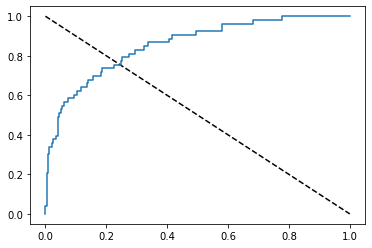

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_rc=LR.predict_proba(x_test)[:,1]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_rc)
plt.plot([0,1],[1,0],"k--")
plt.plot(tpr,fpr,label="LogisticRegressor")
auc_score = roc_auc_score(y_test, LR.predict(x_test))
auc_score

0.6447193298363736

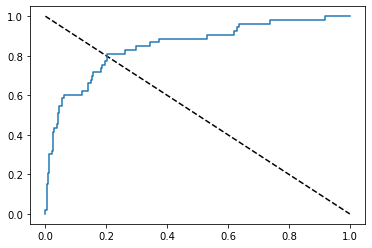

In [47]:
y_pred_rc=model.predict_proba(x_test)[:,1]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_rc)
plt.plot([0,1],[1,0],"k--")
plt.plot(tpr,fpr,label="LogisticRegressor")
auc_score = roc_auc_score(y_test, LR.predict(x_test))
auc_score

In [48]:
#We are observing a similar Curve with both the models

In [49]:
import joblib
joblib.dump(LR,"Attrition.pkl")

['Attrition.pkl']